In [1]:
import pandas as pd

In [2]:
data= pd.read_csv("input.csv")

In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
print (data.shape)

(1470, 35)


In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
# remove unwanted columns

#Column 'over18' has only one unique value 'Y'
# Standard hours has only one unique value '80'
#Employee count  has only one unique value '1'

data = data.drop('Over18', axis=1)
data= data.drop('EmployeeNumber',axis =1)
data= data.drop('StandardHours', axis=1)
data= data.drop('EmployeeCount',axis =1)

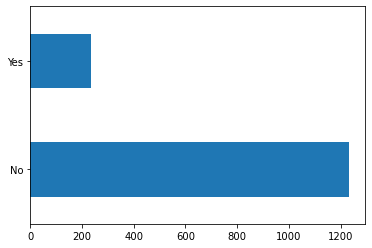

In [8]:
data['Attrition'].value_counts()[:20].plot(kind='barh')

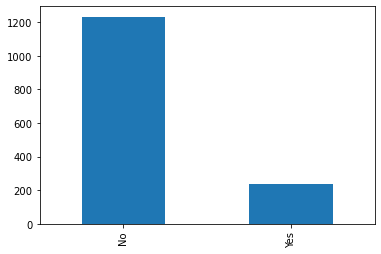

In [9]:
data['Attrition'].value_counts().plot(kind='bar');

In [10]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

(array([ 17.,  11.,  13.,  16.,  14.,  26.,  65.,  48.,  48.,  68.,  60.,
         69., 119.,  77.,  78.,  69.,  50.,  58.,  99.,  40.,  46.,  32.,
         33.,  41.,  57.,  19.,  24.,  30.,  19.,  18.,  37.,  22.,  14.,
          4.,  14.,  15.]),
 array([18.        , 19.16666667, 20.33333333, 21.5       , 22.66666667,
        23.83333333, 25.        , 26.16666667, 27.33333333, 28.5       ,
        29.66666667, 30.83333333, 32.        , 33.16666667, 34.33333333,
        35.5       , 36.66666667, 37.83333333, 39.        , 40.16666667,
        41.33333333, 42.5       , 43.66666667, 44.83333333, 46.        ,
        47.16666667, 48.33333333, 49.5       , 50.66666667, 51.83333333,
        53.        , 54.16666667, 55.33333333, 56.5       , 57.66666667,
        58.83333333, 60.        ]),
 <a list of 36 Patch objects>)

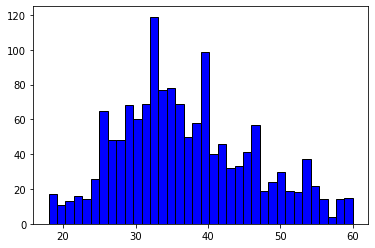

In [11]:
import matplotlib.pyplot as plt
# matplotlib histogram
plt.hist(data['Age'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

In [12]:
duplicate_rows_df = data[data.duplicated()]

In [13]:
duplicate_rows_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [14]:
def plot_correlation_map( data ):
    corr = data.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })


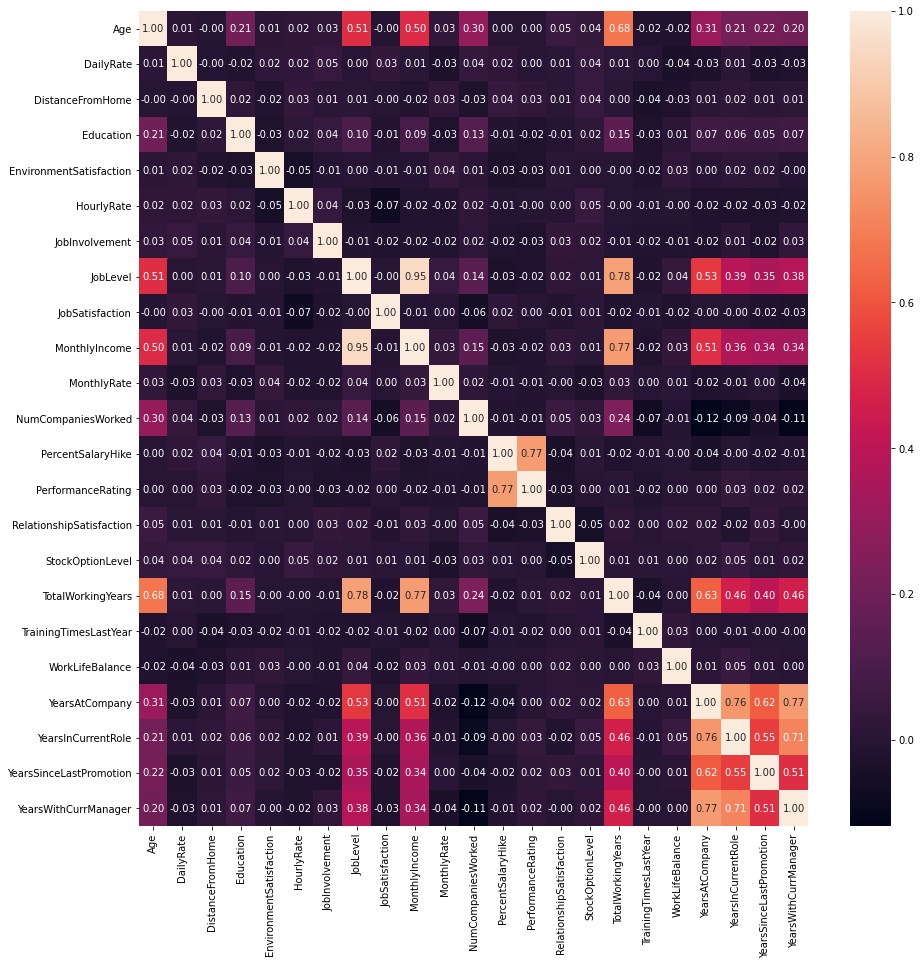

In [15]:
import seaborn as sns
df_c = data.select_dtypes('int64')
plt.figure(figsize=(15,15))
sns.heatmap(df_c.corr(), annot = True, fmt = '.2f')

In [16]:
#Age has a postive correlation with total working years 
# Job level has 78% correlation with total working years 
#Monthly income  has 77% correlation with total working years 
# Monthly income has 95 % correlation with Job level 

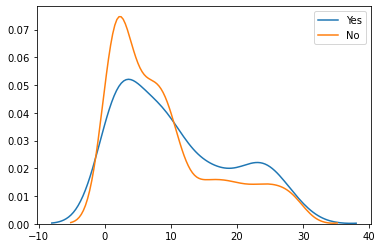

In [17]:
Attrition_Y = data[data['Attrition']=='Yes']
Attrition_N = data[data['Attrition']=='No']
sns.kdeplot(Attrition_Y.DistanceFromHome)
sns.kdeplot(Attrition_N.DistanceFromHome)
plt.legend(('Yes', 'No'))

In [18]:
#distance from home and attrition levels among various job roles.
data.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack()

Attrition,No,Yes
JobRole,,
Healthcare Representative,9.204918,17.666667
Human Resources,6.600000,13.416667
Laboratory Technician,9.329949,9.661290
Manager,7.927835,10.000000
Manufacturing Director,9.533333,8.800000
Research Director,8.474359,7.000000
Research Scientist,8.869388,9.765957
Sales Executive,9.026022,12.649123
Sales Representative,9.000000,8.151515


In [19]:
#Monthly income VS Attrition

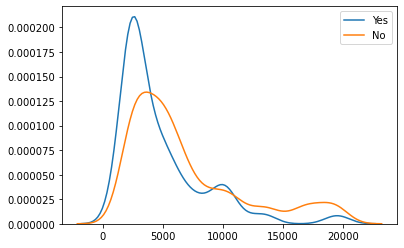

In [20]:
sns.kdeplot(Attrition_Y.MonthlyIncome)
sns.kdeplot(Attrition_N.MonthlyIncome)
plt.legend(('Yes', 'No'))

In [21]:
#Show the number of employees that left and stayed by age

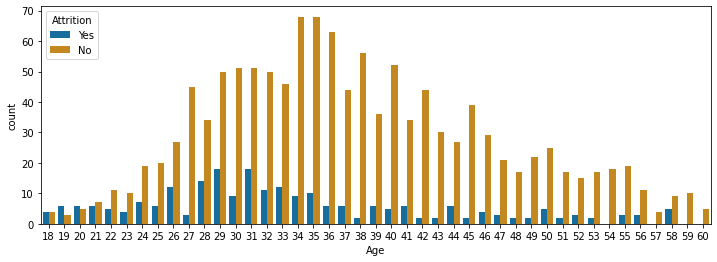

In [22]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age', hue='Attrition',data= data, palette ='colorblind')

In [23]:
#High percentage of people at 34 & 36, stayed at the company , 
#compared to people at age 29 & 31, almost half of the poeple at this age left the company

In [24]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [25]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [26]:
df= [ 'Attrition', 'BusinessTravel', 'Age','DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']



In [27]:
data= data[df]

In [28]:
data

,Attrition,BusinessTravel,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,41,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,Travel_Frequently,49,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,Travel_Rarely,37,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,Travel_Frequently,33,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,Travel_Rarely,27,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,36,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,No,Travel_Rarely,39,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,No,Travel_Rarely,27,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,No,Travel_Frequently,49,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [29]:
#Transform the data (non-numerical to numerical)
import numpy as np
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    if data[column].dtype!="object":
        continue
    encoder_val = LabelEncoder()
    data[column] = encoder_val.fit_transform(data[column])
    print(column," Encoded Vals",encoder_val.classes_)

Attrition  Encoded Vals ['No' 'Yes']
BusinessTravel  Encoded Vals ['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
Department  Encoded Vals ['Human Resources' 'Research & Development' 'Sales']
EducationField  Encoded Vals ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
Gender  Encoded Vals ['Female' 'Male']
JobRole  Encoded Vals ['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
MaritalStatus  Encoded Vals ['Divorced' 'Married' 'Single']
OverTime  Encoded Vals ['No' 'Yes']


In [30]:
#Building models

# Random Forest

In [31]:
data_rf= data

In [32]:
data_rf

,Attrition,BusinessTravel,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,41,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,0,1,49,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,1,2,37,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,0,1,33,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,0,2,27,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,36,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,0,2,39,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,0,2,27,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,0,1,49,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [33]:
x= data_rf.iloc[:,1:data_rf.shape[1]].values
y= data_rf.iloc[:,0].values

In [34]:
from sklearn.model_selection import train_test_split

In [35]:

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25, random_state= 0)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
fr= RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state=0)
fr.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [38]:
fr.score(x_train, y_train)

0.9791288566243194

In [39]:
#Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, fr.predict(x_test))
TN=cn[0][0]
TP=cn[1][1]
FN=cn[1][0]
FP=cn[0][1]
print(cn)

[[308   2]
 [ 48  10]]


In [41]:
print ('Model Accuracy={}'.format((TP+TN)/(TP+TN+FN+FP)))

Model Accuracy=0.8641304347826086


# Feature Importance

In [42]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':data_rf.iloc[:, 1:data_rf.shape[1]].columns,'importance':np.round(fr.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
MonthlyIncome,0.084
Age,0.063
YearsAtCompany,0.061
HourlyRate,0.056
TotalWorkingYears,0.053
MonthlyRate,0.052
DailyRate,0.046
YearsWithCurrManager,0.044
PercentSalaryHike,0.043


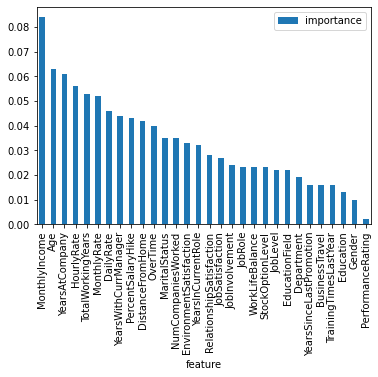

In [43]:
importances.plot.bar()

In [44]:
#Monthly income appears to be the most important feature followed by the persons age, years worked , daily rate, and monthly rate. 

In [45]:
#Feature Selection
#The Recursive Feature Elimination (RFE) works by recursively removing variables and building a model on those variables that remain. It uses the model accuracy to identify which variables (and combination of variables) contribute the most to predicting the target attribute.

In [46]:
# Top 10 significant columns in predicting the target variable

columns= ['MonthlyIncome','Age','YearsAtCompany','HourlyRate','TotalWorkingYears','MonthlyRate','DailyRate','YearsWithCurrManager',
'PercentSalaryHike','DistanceFromHome']

In [47]:
X=data[columns]

In [48]:
Y=data['Attrition']

In [49]:
X

,MonthlyIncome,Age,YearsAtCompany,HourlyRate,TotalWorkingYears,MonthlyRate,DailyRate,YearsWithCurrManager,PercentSalaryHike,DistanceFromHome
0,5993,41,6,94,8,19479,1102,5,11,1
1,5130,49,10,61,10,24907,279,7,23,8
2,2090,37,0,92,7,2396,1373,0,15,2
3,2909,33,8,56,8,23159,1392,0,11,3
4,3468,27,2,40,6,16632,591,2,12,2
...,...,...,...,...,...,...,...,...,...,...
1465,2571,36,5,41,17,12290,884,3,17,23
1466,9991,39,7,42,9,21457,613,7,15,6
1467,6142,27,6,87,6,5174,155,3,20,4
1468,5390,49,9,63,17,13243,1023,8,14,2


# Logistic Regression Model 

In [50]:
#Split data into training and test samples

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/Users/rishimidha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(Y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.841


# SVM classifier

In [53]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [54]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(Y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.841


# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
for K in range(10):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, Y_train) 
    predict_Y = neigh.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,predict_Y)*100,"% for K-Value:",K_value)

Accuracy is  74.37641723356009 % for K-Value: 1
Accuracy is  83.21995464852607 % for K-Value: 2
Accuracy is  79.59183673469387 % for K-Value: 3
Accuracy is  83.44671201814059 % for K-Value: 4
Accuracy is  81.63265306122449 % for K-Value: 5
Accuracy is  83.6734693877551 % for K-Value: 6
Accuracy is  82.53968253968253 % for K-Value: 7
Accuracy is  83.90022675736961 % for K-Value: 8
Accuracy is  83.21995464852607 % for K-Value: 9
Accuracy is  84.12698412698413 % for K-Value: 10


The optimal number of neighbors is  17 


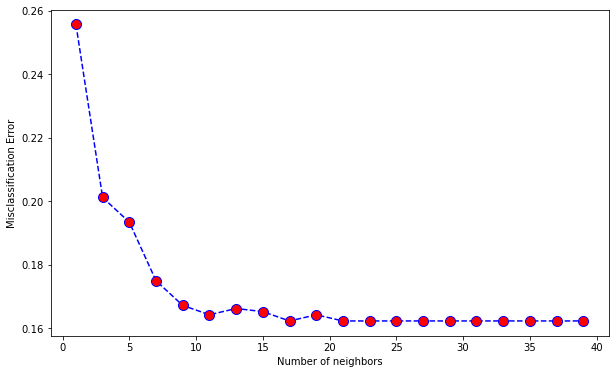

In [57]:
from sklearn.neighbors import KNeighborsClassifier 
neighbors = []  
cv_scores = [] 
from sklearn.model_selection import cross_val_score  
# perform 10 fold cross validation  
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores = cross_val_score(  
        knn, X_train, Y_train, cv = 10, scoring = 'accuracy')  
    cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores]  
    
# determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  
    
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors')  
plt.ylabel('Misclassification Error')  
plt.show()

In [58]:
from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 
  
def print_score(clf, X_train, Y_train, X_test, Y_test, train = True): 
    if train: 
        print("Train Result:") 
        print("------------") 
        print("Classification Report: \n {}\n".format(classification_report( 
                Y_train, clf.predict(X_train)))) 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix( 
                Y_train, clf.predict(X_train)))) 
  
        res = cross_val_score(clf, X_train, Y_train,  
                              cv = 10, scoring ='accuracy') 
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res))) 
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res))) 
        print("accuracy score: {0:.4f}\n".format(accuracy_score( 
                Y_train, clf.predict(X_train)))) 
        print("----------------------------------------------------------") 
                 
    elif train == False: 
        print("Test Result:") 
        print("-----------") 
        print("Classification Report: \n {}\n".format( 
                classification_report(Y_test, clf.predict(X_test)))) 
        print("Confusion Matrix: \n {}\n".format( 
                confusion_matrix(Y_test, clf.predict(X_test))))  
        print("accuracy score: {0:.4f}\n".format( 
                accuracy_score(Y_test, clf.predict(X_test)))) 
        print("-----------------------------------------------------------") 
          
knn = KNeighborsClassifier(n_neighbors = 19) 
knn.fit(X_train, Y_train) 
print_score(knn, X_train, Y_train, X_test, Y_test, train = True) 
print_score(knn, X_train, Y_train, X_test, Y_test, train = False) 


Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       862
           1       1.00      0.01      0.02       167

    accuracy                           0.84      1029
   macro avg       0.92      0.51      0.47      1029
weighted avg       0.87      0.84      0.77      1029


Confusion Matrix: 
 [[862   0]
 [165   2]]

Average Accuracy: 	 0.8358
Accuracy SD: 		 0.0050
accuracy score: 0.8397

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441


Confusion Matrix: 
 [[371   0]
 [ 69   1]]

accuracy score: 0.843

In [70]:
import warnings
warnings.filterwarnings('ignore')

# Precision and Recall

In [71]:
#Precison Recall Scores for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, fr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       310
           1       0.83      0.17      0.29        58

    accuracy                           0.86       368
   macro avg       0.85      0.58      0.61       368
weighted avg       0.86      0.86      0.82       368



In [72]:
#PR scores for SVM

print(classification_report(Y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



In [73]:
#PRScores for Logistic Regression
print(classification_report(Y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



# Accuracy for different models

Random Forest: 86.41%
Logistic Regression: 84.4%
SVM : 84.1%
KNN:  83.9%


In [74]:
def parameter_input():
    n={'Age': None,
    'BusinessTravel': None, 
   'DailyRate': None, 
   'Department': None,
    'DistanceFromHome': None,
   'Education': None, 
   'EducationField': None,   
   'EnvironmentSatisfaction': None, 
   'Gender': None, 
   'HourlyRate': None, 
   'JobInvolvement': None,
    'JobLevel': None, 
   'JobRole': None, 
   'JobSatisfaction': None, 
   'MaritalStatus': None,
    'MonthlyIncome': None, 
   'MonthlyRate': None, 
   'NumCompaniesWorked': None, 
   'OverTime': None,
    'PercentSalaryHike': None, 
   'PerformanceRating': None, 
   'RelationshipSatisfaction': None,
    'StockOptionLevel': None, 
   'TotalWorkingYears': None, 
   'TrainingTimesLastYear': None,
    'WorkLifeBalance': None, 
   'YearsAtCompany': None, 
   'YearsInCurrentRole': None,
    'YearsSinceLastPromotion': None, 
   'YearsWithCurrManager': None
  }
    for key in n:
        string="Enter value of "+key+" :"
        n[key]=input(string)
    for key in n:
        if(n[key]==''):
            n[key]=None
        else:
            n[key]=int(n[key])
    return n

In [75]:
parameters=parameter_input()

Enter value of Age :
Enter value of BusinessTravel :
Enter value of DailyRate :
Enter value of Department :
Enter value of DistanceFromHome :
Enter value of Education :3
Enter value of EducationField :3
Enter value of EnvironmentSatisfaction :3
Enter value of Gender :3
Enter value of HourlyRate :3
Enter value of JobInvolvement :3
Enter value of JobLevel :3
Enter value of JobRole :3
Enter value of JobSatisfaction :3
Enter value of MaritalStatus :3
Enter value of MonthlyIncome :3
Enter value of MonthlyRate :3
Enter value of NumCompaniesWorked :3
Enter value of OverTime :3
Enter value of PercentSalaryHike :3
Enter value of PerformanceRating :3
Enter value of RelationshipSatisfaction :3
Enter value of StockOptionLevel :33
Enter value of TotalWorkingYears :3
Enter value of TrainingTimesLastYear :3
Enter value of WorkLifeBalance :3
Enter value of YearsAtCompany :3
Enter value of YearsInCurrentRole :3
Enter value of YearsSinceLastPromotion :3
Enter value of YearsWithCurrManager :


In [76]:
i=0
for key in parameters.copy():
        if parameters[key] is None:
            i+=1
print(i)

6


In [80]:
def model_input():
    model_dict={'Logistic Regression': 1,
        'SVM': 2,
        'Random Forest': 4,
        'KNN': 4
        }
    print(model_dict)
    model=int(input("Choose Model : "))
    for key in model_dict:
        if(model_dict[key]==model):
            print("Model chosen is :",key)
    return(model)

In [81]:
model=model_input()

{'Logistic Regression': 1, 'SVM': 2, 'Random Forest': 4, 'KNN': 4}
Choose Model : 4
Model chosen is : Random Forest
Model chosen is : KNN


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

In [83]:
def model_implement(parameters,model):
    y=data_rf['Attrition']
    x=data_rf
    x=x.drop('Attrition',axis =1)
    column_list=[]
    column_list.clear()
    for key in parameters.copy():
        if parameters[key] is None:
            column_list.append(key)
            parameters.pop(key)
    for i in column_list:
        x=x.drop(i, axis=1)
    testing=pd.DataFrame([parameters])
    #print(testing.shape,column_list,x.shape)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    if(model==1):
        lr = LogisticRegression(fit_intercept = False, C = 1e9)
        lr.fit(x_train,y_train)
        y_pred=lr.predict(x_test)
        accuracyScore = metrics.accuracy_score(y_test, y_pred)
        print('Accuracy In Percentage : ', int(accuracyScore*100), '%')
        y_pred=lr.predict(testing)
        if(y_pred==0):
            print("No")
        else :
            print("Yes")
    if(model==2):
        svc = SVC()
        svc.fit(x_train, y_train)
        accuracyScore=accuracy_score(y_test, svc.predict(x_test))
        print('Accuracy Score : ',accuracyScore)
        y_pred=svc.predict(testing)
        if(y_pred==0):
            print("No")
        else :
            print("Yes")
    if(model==3):
        fr= RandomForestClassifier(n_estimators=10, criterion ='entropy', random_state=0)
        fr.fit(x_train,y_train)
        accuracyScore=accuracy_score(y_test, fr.predict(x_test))
        print('Accuracy Score : ',accuracyScore)
        y_pred=fr.predict(testing)
        if(y_pred==0):
            print("No")
        else :
            print("Yes")
    if(model==4):
        k=int(input("Enter value of k :"))
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        accuracyScore=accuracy_score(y_test, knn.predict(x_test))
        print('Accuracy Score : ',accuracyScore)
        y_pred=knn.predict(testing)
        if(y_pred==0):
            print("No")
        else :
            print("Yes")
    
    
            
    
    

In [84]:
model_implement(parameters,model)

Enter value of k :17
Accuracy Score :  0.8412698412698413
No
